<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/Copy_of_Copy_of_fft_r1_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=930816c5873ee23ef295d9b983a50069a52f2f2a58295da5bbe487b27a8209be
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-15-m-1-r1.csv?token=AKVFSOD6JDSDYXBFT4ZN7WS622BUM')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-15-m-11-r1.csv?token=AKVFSODCWETYSEDKL3KP35K622BUS')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-4-m-1-r1.csv?token=AKVFSOANEWBKM2LBURMOAQK622BUW')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-4-m-11-r1.csv?token=AKVFSOF5DXOYB6IRDHYTFHC622BZE')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-6-m-1-r1.csv?token=AKVFSOEOSUEYK57XLGLOQYK622B26')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-6-m-11-r1.csv?token=AKVFSOFPIVFASLZAOCOK75K622BVC')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-9-m-1-r1.csv?token=AKVFSOEQCACRMXXZ5SQRCNS622BVG')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-9-m-11-r1.csv?token=AKVFSOEMHI3HMGWDPFQCZFK622BVK')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-normal-n-0-15-r1.csv?token=AKVFSOFADC74Y6LC7QGAGJ2622BVO')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-normal-n-0-4-r1.csv?token=AKVFSOFIGQLRZNWW4VBH7M2622BVQ')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-normal-n-0-6-r1.csv?token=AKVFSOA2XKSPRQPD4RM54MC622BVU')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-normal-n-0-9-r1.csv?token=AKVFSOEU3WLELBTVKTHAH2C622BV2')

df1['target'] = 0
df2['target'] = 0
df3['target'] = 0
df4['target'] = 0
df5['target'] = 0
df6['target'] = 0
df7['target'] = 0
df8['target'] = 0

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(116064, 30)
(57667, 30)
(116768, 30)
(58499, 30)
(116217, 30)
(57941, 30)
(117167, 30)
(58789, 30)
(45531, 30)
(46322, 30)
(45790, 30)
(46621, 30)


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,7,1,7,7,49,0,1,4,8,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,1,1,1,1,1,8,1,4,4,3,27,9,1
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,6,2,7,12,84,8,1,4,4,3,27,9,0
3,88,0,1,4,1,1,5,17,23,7,1,1,2,3,3,1.000000,16,5,3,7,15,105,0,4,4,8,20,85,100,0
4,89,0,1,4,2,2,5,17,23,7,1,1,2,3,3,1.000000,17,4,4,7,16,112,0,8,16,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161590,3276525,4,2,6,2,2,3,9,18,2,20,4,30091,3,1,0.333333,15,1,1,1,1,1,8,12,24,722184,18,27,54,0
161591,3276532,4,2,6,3,2,3,9,18,2,20,4,30091,3,1,0.333333,22,1,1,1,1,1,8,18,36,1083276,18,27,54,0
161592,3276539,4,2,6,4,2,3,9,18,2,20,4,30091,3,1,0.333333,29,1,1,1,1,1,8,24,48,1444368,18,27,54,0
161593,3276546,4,2,6,5,3,3,9,18,2,20,4,30091,3,1,0.333333,36,1,1,1,1,1,8,30,90,2708190,18,27,54,0


In [0]:
df.shape

(161595, 30)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-15-m-12-r1.csv?token=AKVFSOC5XM3RFQPVI75TC6K63CV5K')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-15-m-7-r1.csv?token=AKVFSOASYGZPDONS5ELSCO263CV5Q')
df13['target'] = 0
df14['target'] = 0

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-15-m-12-r1.csv?token=AKVFSOC5XM3RFQPVI75TC6K63CV5K')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/dataset-router/r1/2-fft-malicious-n-0-15-m-7-r1.csv?token=AKVFSOASYGZPDONS5ELSCO263CV5Q')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r1/2-fft-malicious-n-0-4-m-12-r1.csv?token=AKVFSOBA3XYPAOZW7VSB7FK62AL4Y')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r1/2-fft-malicious-n-0-4-m-7-r1.csv?token=AKVFSOEDZ55N3MQDVBRCQVC62AL42')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r1/2-fft-malicious-n-0-6-m-12-r1.csv?token=AKVFSOCOLU7EK3ISPCNUI7C62AL5K')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r1/2-fft-malicious-n-0-6-m-7-r1.csv?token=AKVFSOGQ23N3PWMFBSTX7MC62AL5M')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r1/2-fft-malicious-n-0-9-m-12-r1.csv?token=AKVFSOG5CFYYOJ7KFJQP6D262AL5Y')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r1/2-fft-malicious-n-0-9-m-7-r1.csv?token=AKVFSOGHA5OZP4AS7RX34IK62AL56')

HTTPError: ignored

In [0]:
df13['target'] = 0
df14['target'] = 0
df15['target'] = 0
df16['target'] = 0
df17['target'] = 0
df18['target'] = 0
df19['target'] = 0
df20['target'] = 0

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

In [0]:
df5

Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.092532,0.240906,-0.007207,0.010960,-0.538976,-0.468072,-0.063743,0.088004,-0.500815,-0.647002,0.053636,-0.073745,0.089950,0.010912,0.042942,0.045043,0.446787,0.149696,0.112913,0.041647,-0.098277,-0.515797,-0.376441,0.170958
inport,-0.092532,1.000000,-0.058424,0.008267,-0.012573,-0.212901,-0.344010,-0.073767,0.284479,0.071368,0.155448,0.160315,-0.060677,-0.161113,-0.149348,-0.105155,-0.080387,0.726341,0.000231,-0.009574,-0.044149,-0.180403,-0.269035,-0.233002,0.349526
cache_coherence_type,0.240906,-0.058424,1.000000,0.286043,-0.434992,-0.185334,-0.238341,-0.006969,-0.008160,-0.057714,-0.085743,-0.378708,0.051108,-0.043216,0.005314,0.022980,0.025121,0.087807,0.499475,0.409274,0.275600,0.811694,-0.209118,0.373993,0.048185
flit_id,-0.007207,0.008267,0.286043,1.000000,-0.010229,0.121085,0.070707,0.017003,0.020545,0.019627,0.001368,0.468487,-0.014151,0.060423,0.031159,0.050793,0.032525,0.002961,0.957382,0.916548,0.663502,0.335660,0.101743,0.271289,-0.020561
flit_type,0.010960,-0.012573,-0.434992,-0.010229,1.000000,-0.184137,-0.107526,-0.025856,-0.031244,-0.029847,-0.002080,0.527475,-0.140789,0.153852,0.008796,-0.019911,-0.013501,-0.004502,-0.088919,0.170125,0.121542,-0.510445,-0.154722,-0.412555,0.031268
vnet,-0.538976,-0.212901,-0.185334,0.121085,-0.184137,1.000000,0.955227,0.077890,-0.042689,0.541517,0.640518,-0.144611,0.084256,0.026656,0.074686,0.026713,-0.004371,-0.370313,-0.035907,-0.048231,0.005017,0.423530,0.992603,0.842050,-0.277307
vc,-0.468072,-0.344010,-0.238341,0.070707,-0.107526,0.955227,1.000000,0.079743,-0.113998,0.428091,0.522961,-0.144599,0.077361,0.071255,0.100074,0.045789,0.012661,-0.464247,-0.086377,-0.081622,-0.019345,0.348053,0.984082,0.770699,-0.309589
traversal_id,-0.063743,-0.073767,-0.006969,0.017003,-0.025856,0.077890,0.079743,1.000000,0.021944,-0.000375,-0.008066,-0.020739,0.145250,0.145321,0.195664,0.155413,0.129923,-0.082634,-0.001016,-0.001651,0.548951,0.039872,0.079505,0.069686,-0.279048
hop_count,0.088004,0.284479,-0.008160,0.020545,-0.031244,-0.042689,-0.113998,0.021944,1.000000,0.379554,0.021887,0.230720,-0.079746,-0.070675,-0.101290,-0.079456,-0.068727,0.427078,0.019406,0.008107,0.017205,-0.032896,-0.072418,-0.044769,0.127296
current_hop,-0.500815,0.071368,-0.057714,0.019627,-0.029847,0.541517,0.428091,-0.000375,0.379554,1.000000,0.842015,0.204472,0.061631,-0.076381,-0.009932,-0.019598,-0.017967,-0.049617,-0.053058,-0.035433,-0.026984,0.268663,0.500918,0.479394,-0.028814


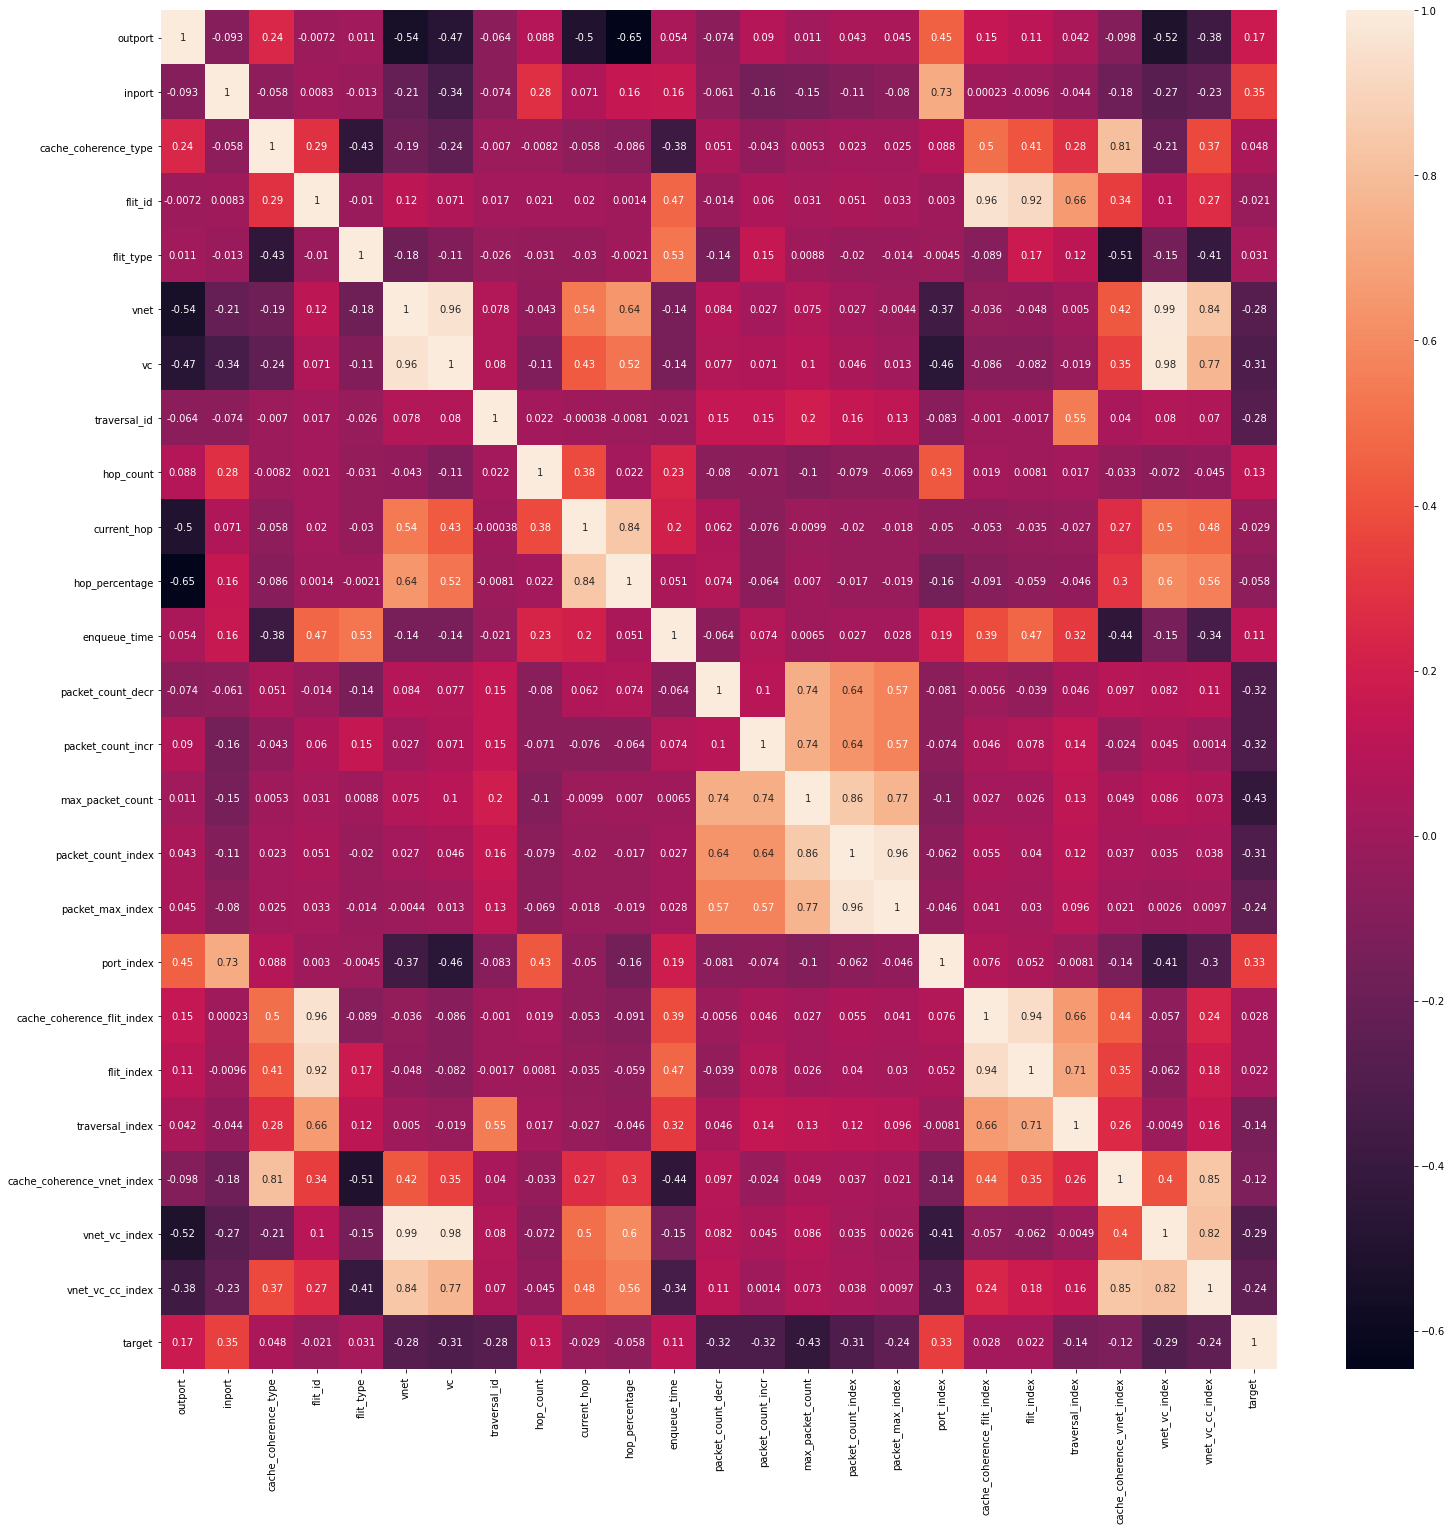

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['flit_index', 'flit_id', 'vnet_vc_index', 'vnet', 'packet_count_index']

In [0]:
df = df.drop(columns=['vnet_vc_index','flit_index'])

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['flit_id', 'vnet', 'packet_count_index']

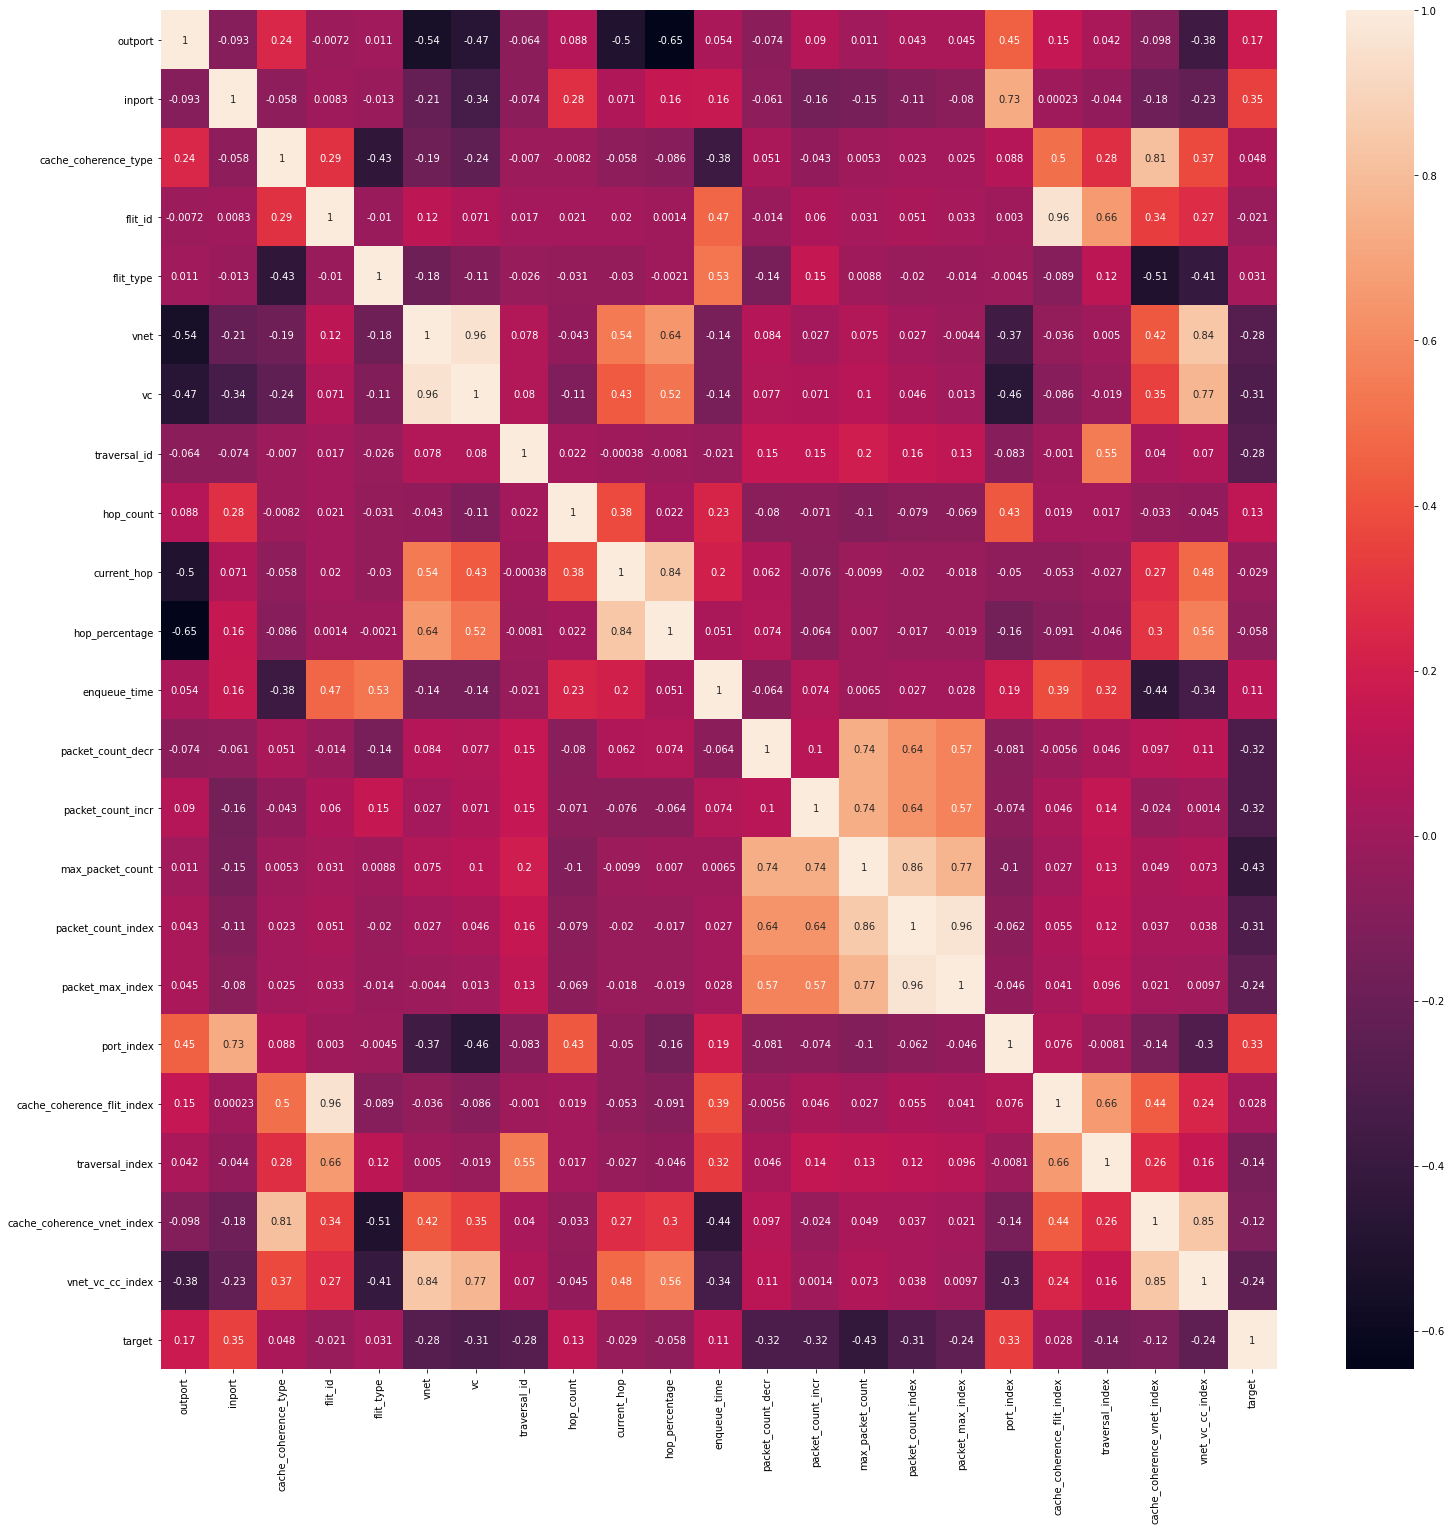

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
df = df.drop(columns=['packet_max_index','cache_coherence_flit_index'])

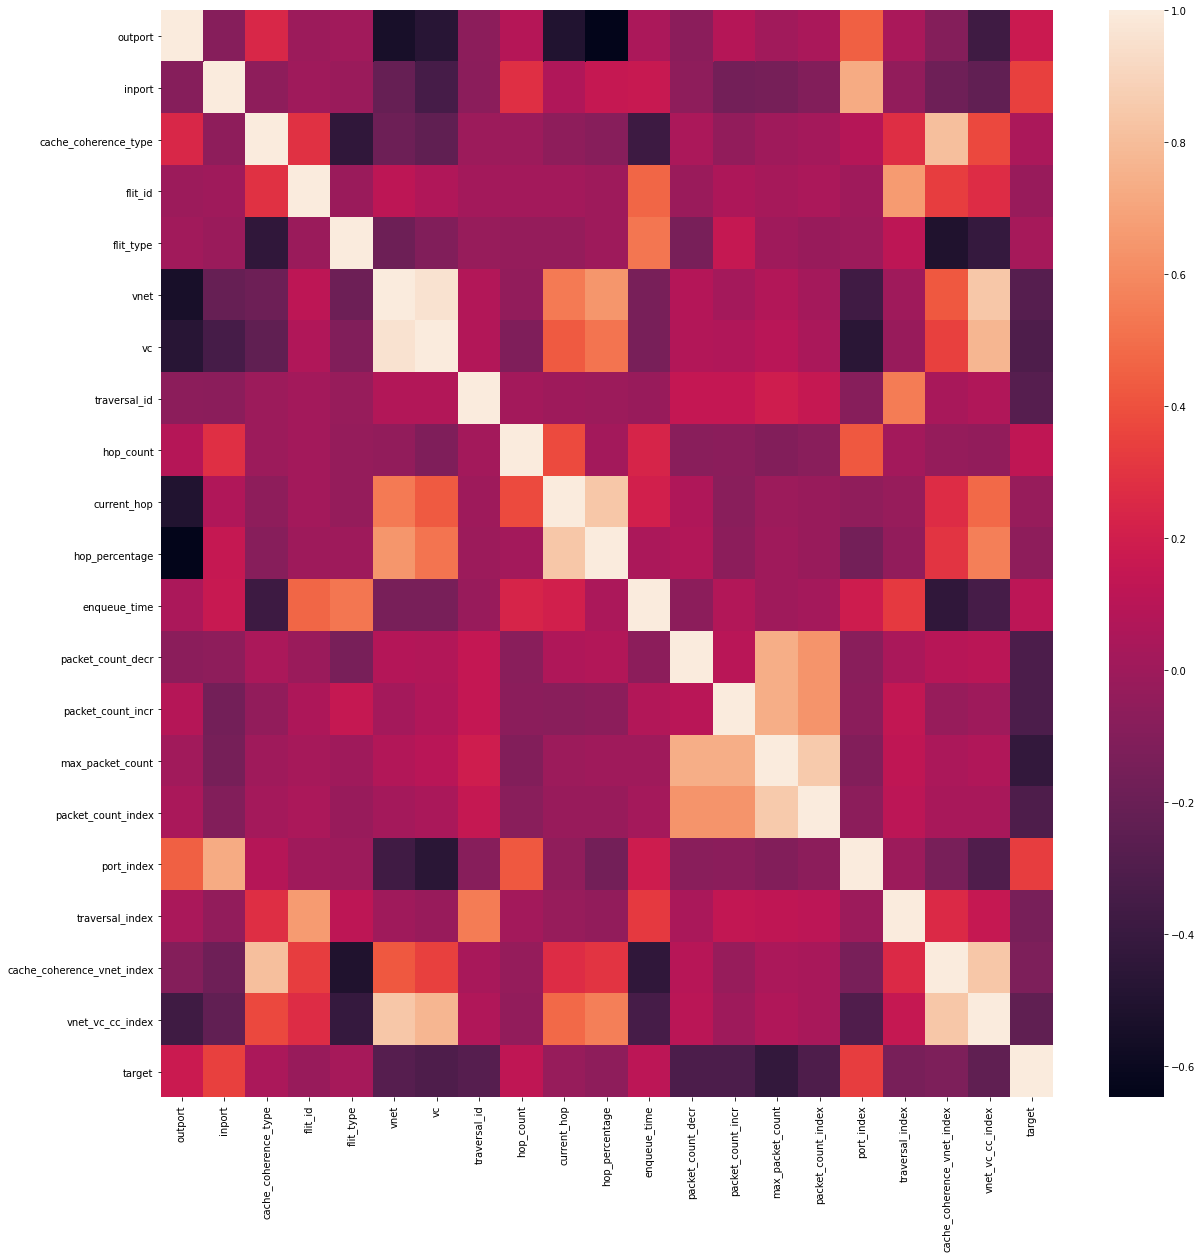

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())
plt.show()

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']),0.80)
columns_to_drop

['cache_coherence_type',
 'vnet_vc_cc_index',
 'vnet',
 'current_hop',
 'max_packet_count']

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,7,1,7,7,0,8,3,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,1,1,1,1,8,4,3,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,6,2,7,12,8,4,3,9
3,0,1,4,1,1,5,17,2,3,3,1.000000,16,5,3,7,15,0,8,20,100
4,0,1,4,2,2,5,17,2,3,3,1.000000,17,4,4,7,16,0,32,20,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161590,4,2,6,2,2,3,9,30091,3,1,0.333333,15,1,1,1,1,8,722184,18,54
161591,4,2,6,3,2,3,9,30091,3,1,0.333333,22,1,1,1,1,8,1083276,18,54
161592,4,2,6,4,2,3,9,30091,3,1,0.333333,29,1,1,1,1,8,1444368,18,54
161593,4,2,6,5,3,3,9,30091,3,1,0.333333,36,1,1,1,1,8,2708190,18,54


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.0,0.000000,0.000000,0.171429,0.000000,0.171429,0.017595,0.0,0.000001,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.142857,0.028571,0.171429,0.032258,1.0,0.000000,0.000000,0.000000
3,0.0,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.500000,0.6,1.000000,0.187500,0.114286,0.057143,0.171429,0.041056,0.0,0.000001,0.944444,1.000000
4,0.0,0.25,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.500000,0.6,1.000000,0.203125,0.085714,0.085714,0.171429,0.043988,0.0,0.000010,0.944444,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161590,1.0,0.50,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.171875,0.000000,0.000000,0.000000,0.000000,1.0,0.266666,0.833333,0.494505
161591,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.281250,0.000000,0.000000,0.000000,0.000000,1.0,0.399999,0.833333,0.494505
161592,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.390625,0.000000,0.000000,0.000000,0.000000,1.0,0.533333,0.833333,0.494505
161593,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.833333,0.494505


In [0]:
train_X[train_X.duplicated()].shape

(215, 20)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','vnet_vc_index','flit_index','packet_max_index','cache_coherence_flit_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(32, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000233,0.4,0.2,0.333333,0.062500,0.0,0.0,0.0,0.0,1.0,0.000010,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000333,0.6,0.2,0.250000,0.062500,0.0,0.0,0.0,0.0,1.0,0.000015,0.000000,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000432,0.2,0.2,0.500000,0.062500,0.0,0.0,0.0,0.0,0.5,0.000019,0.000000,0.000000
4,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000499,0.8,1.0,1.000000,0.312500,0.0,0.0,0.0,0.0,0.0,0.000022,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58494,1.00,0.50,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.171875,0.0,0.0,0.0,0.0,1.0,0.266666,0.833333,0.833333
58495,1.00,0.50,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.281250,0.0,0.0,0.0,0.0,1.0,0.399999,0.833333,0.833333
58496,1.00,0.50,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.390625,0.0,0.0,0.0,0.0,1.0,0.533333,0.833333,0.833333
58497,1.00,0.50,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.500000,0.0,0.0,0.0,0.0,1.0,1.000000,0.833333,0.833333


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','vnet_vc_index','flit_index','packet_max_index','cache_coherence_flit_index' ])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(24, 20)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(27, 24)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(27, 24)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(27, 24)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(32, 24)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(30, 24)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(32, 24)


In [0]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]

In [0]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_X10  = test_X2[:30000]
test_X11  = test_X3[:30000]
test_X12  = test_X4[:30000]
test_X13  = test_X5[:30000]
test_X14  = test_X6[:30000]
test_X15  = test_X7[:30000]

test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]
test_Y10  = test_Y2[:30000]
test_Y11  = test_Y3[:30000]
test_Y12  = test_Y4[:30000]
test_Y13  = test_Y5[:30000]
test_Y14  = test_Y6[:30000]
test_Y15  = test_Y7[:30000]

test_X8

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000233,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000010,0.000000,0.0,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000333,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000015,0.000000,0.0,0.000000
3,0.25,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000432,0.2,0.2,0.500000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000019,0.000000,0.0,0.000000
4,0.00,0.25,0.000000,0.00,1.000000,0.0,0.0,0.000499,0.8,1.0,1.000000,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000022,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.00,0.666667,0.00,0.000000,0.0,0.0,0.403698,0.8,0.2,0.200000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.137931,0.011628,0.022428,0.666667,0.0,0.666667
29996,0.50,1.00,0.666667,0.25,0.333333,0.0,0.0,0.403698,0.8,0.2,0.200000,0.171875,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.310345,0.186047,0.089717,0.666667,0.0,0.666667
29997,0.50,1.00,0.666667,0.50,0.333333,0.0,0.0,0.403698,0.8,0.2,0.200000,0.281250,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.482759,0.302326,0.134576,0.666667,0.0,0.666667
29998,0.50,1.00,0.666667,0.75,0.333333,0.0,0.0,0.403698,0.8,0.2,0.200000,0.390625,0.076923,0.000000,0.076923,0.010256,0.001512,1.0,0.655172,0.418605,0.179435,0.666667,0.0,0.666667


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    116064
1     45531
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  8339.750453
16                  port_index  8101.729555
6                           vc  7025.088929
1                       inport  5710.594789
14            max_packet_count  4183.848581
12           packet_count_decr  2093.169424
13           packet_count_incr  2090.679210
7                 traversal_id  1668.887851
15          packet_count_index  1561.746874
0                      outport  1241.280878
19            vnet_vc_cc_index  1163.751343
17             traversal_index   475.426920
18  cache_coherence_vnet_index   220.294575
8                    hop_count   202.903171
11                enqueue_time   166.424732
10              hop_percentage   162.110365
4                    flit_type    32.321477


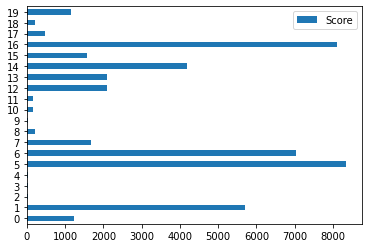

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 84.06974225687675
Test Prediction  84.31263343544046


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  74.74999572642267
Test Prediction  75.20072138311339


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  98.78972290124618
Test Prediction  98.83468881682765
Test Prediction  98.8453755505297
Test Prediction  98.79143233217663
Test Prediction  98.83898668956633
Test Prediction  98.7779829815144
Test Prediction  98.85625338386573
Test Prediction  98.79923804340432


In [0]:
y_pred_test = logreg.predict(test_X8)
logreg_score_test = accuracy_score(test_Y8,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X9)
logreg_score_test = accuracy_score(test_Y9,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X10)
logreg_score_test = accuracy_score(test_Y10,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X11)
logreg_score_test = accuracy_score(test_Y11,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X12)
logreg_score_test = accuracy_score(test_Y12,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X13)
logreg_score_test = accuracy_score(test_Y13,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X14)
logreg_score_test = accuracy_score(test_Y14,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X15)
logreg_score_test = accuracy_score(test_Y15,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  97.64
Test Prediction  97.76
Test Prediction  97.73666666666668
Test Prediction  97.64333333333333
Test Prediction  97.74666666666667
Test Prediction  97.64
Test Prediction  97.74666666666667
Test Prediction  97.64666666666668


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
2,cache_coherence_type,2.109553
1,inport,2.095321
18,cache_coherence_flit_index,1.875152
16,packet_max_index,1.355601
6,vc,1.330052
0,outport,1.267851
11,enqueue_time,0.751963
15,packet_count_index,0.392958
10,hop_percentage,0.303009
4,flit_type,0.197183


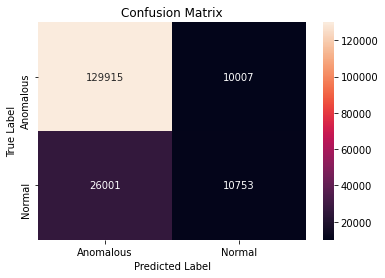

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88    139922
           1       0.52      0.29      0.37     36754

    accuracy                           0.80    176676
   macro avg       0.68      0.61      0.63    176676
weighted avg       0.77      0.80      0.77    176676



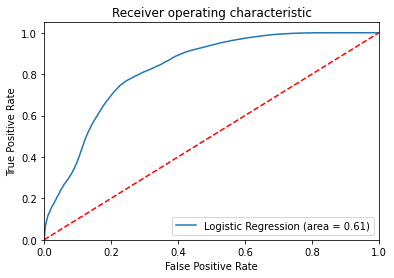

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

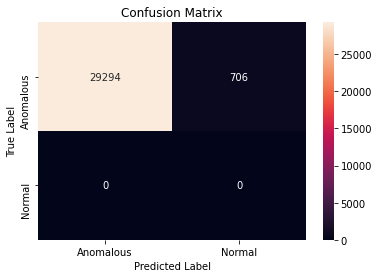

In [0]:
cm = confusion_matrix(test_Y15, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.98     30000
   macro avg       0.50      0.49      0.49     30000
weighted avg       1.00      0.98      0.99     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 93.13598415169095
Test Prediction  89.75356018927302


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.84936494640934
Test Prediction  89.16884873497841
Test Prediction  89.26998486574728
Test Prediction  91.94516145575138
Test Prediction  89.0596822670674
Test Prediction  90.5638883614961
Test Prediction  88.66912560909583
Test Prediction  92.62364786720185


In [0]:
y_pred_knn_test= knn.predict(test_X8)
knn_score_test = accuracy_score(test_Y8,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X9)
knn_score_test = accuracy_score(test_Y9,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X10)
knn_score_test = accuracy_score(test_Y10,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X11)
knn_score_test = accuracy_score(test_Y11,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X12)
knn_score_test = accuracy_score(test_Y12,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X13)
knn_score_test = accuracy_score(test_Y13,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X14)
knn_score_test = accuracy_score(test_Y14,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X15)
knn_score_test = accuracy_score(test_Y15,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  85.28
Test Prediction  87.08
Test Prediction  88.51333333333334
Test Prediction  90.36999999999999
Test Prediction  86.81333333333333
Test Prediction  88.78666666666668
Test Prediction  87.41666666666667
Test Prediction  91.42333333333333


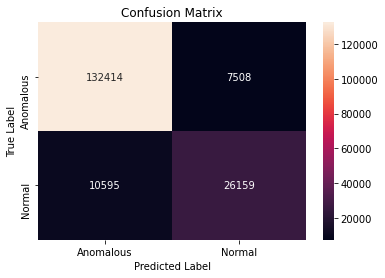

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    139922
           1       0.78      0.71      0.74     36754

    accuracy                           0.90    176676
   macro avg       0.85      0.83      0.84    176676
weighted avg       0.89      0.90      0.90    176676



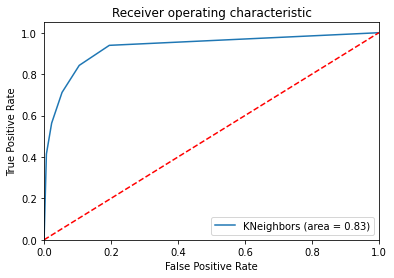

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

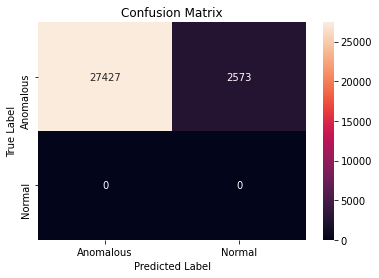

In [0]:
cm = confusion_matrix(test_Y15, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.91     30000
   macro avg       0.50      0.46      0.48     30000
weighted avg       1.00      0.91      0.96     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 46.12013584264893
Test Prediction Score 46.18284317054948


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 42.431494555462486
Test Prediction  38.31654152288137
Test Prediction  42.01200537350996
Test Prediction  40.60411289081864
Test Prediction  39.12408759124087
Test Prediction  38.57120665550512
Test Prediction  39.77057390362751
Test Prediction  43.20021770188448


In [0]:
y_pred_nb_test= nb.predict(test_X8)
nb_score_test = accuracy_score(test_Y8,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X9)
nb_score_test = accuracy_score(test_Y9,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X10)
nb_score_test = accuracy_score(test_Y10,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X11)
nb_score_test = accuracy_score(test_Y11,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X12)
nb_score_test = accuracy_score(test_Y12,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X13)
nb_score_test = accuracy_score(test_Y13,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X14)
nb_score_test = accuracy_score(test_Y14,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X15)
nb_score_test = accuracy_score(test_Y15,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 42.56333333333333
Test Prediction  37.71666666666667
Test Prediction  41.39
Test Prediction  40.54
Test Prediction  38.57
Test Prediction  38.053333333333335
Test Prediction  38.71
Test Prediction  43.0


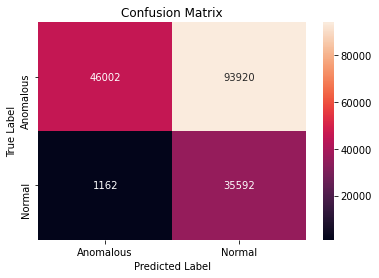

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.33      0.49    139922
           1       0.27      0.97      0.43     36754

    accuracy                           0.46    176676
   macro avg       0.63      0.65      0.46    176676
weighted avg       0.83      0.46      0.48    176676



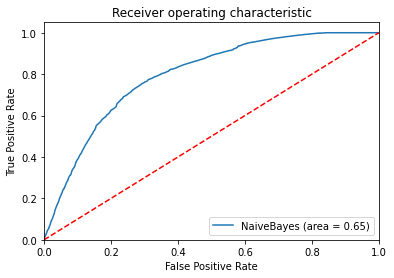

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 565360 samples, validate on 141340 samples
Epoch 1/15
565360/565360 [==============================] - 27s 48us/step - loss: 0.1307 - accuracy: 0.7987 - val_loss: 0.1272 - val_accuracy: 0.8032
Epoch 2/15
565360/565360 [==============================] - 27s 47us/step - loss: 0.1272 - accuracy: 0.8009 - val_loss: 0.1265 - val_accuracy: 0.8034
Epoch 3/15
565360/565360 [==============================] - 26s 47us/step - loss: 0.1268 - accuracy: 0.8012 - val_loss: 0.1263 - val_accuracy: 0.8029
Epoch 4/15
565360/565360 [==============================] - 26s 47us/step - loss: 0.1266 - accuracy: 0.8011 - val_loss: 0.1260 - val_accuracy: 0.8024
Epoch 5/15
565360/565360 [==============================] - 26s 46us/step - loss: 0.1264 - accuracy: 0.8011 - val_loss: 0.1259 - val_accuracy: 0.8019
Epoch 6/15
565360/565360 [==============================] - 27s 48us/step - loss: 0.1263 - accuracy: 0.8014 - val_loss: 0.1258 - val_accuracy: 0.8044
Epoch 7/15
565360/565360 [======================

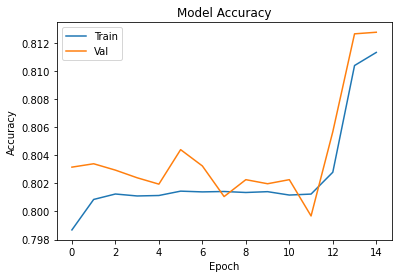

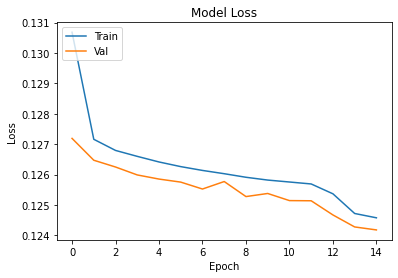

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.32%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.58%
accuracy: 81.06%
accuracy: 81.99%
accuracy: 85.80%
accuracy: 81.23%
accuracy: 85.67%
accuracy: 81.79%
accuracy: 86.78%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.84%
accuracy: 65.70%
accuracy: 66.22%
accuracy: 73.31%
accuracy: 65.45%
accuracy: 73.63%
accuracy: 66.16%
accuracy: 75.41%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 565360 samples, validate on 141340 samples
Epoch 1/15
565360/565360 [==============================] - 23s 41us/step - loss: 0.1423 - accuracy: 0.7960 - val_loss: 0.1292 - val_accuracy: 0.7988
Epoch 2/15
565360/565360 [==============================] - 24s 42us/step - loss: 0.1283 - accuracy: 0.7985 - val_loss: 0.1274 - val_accuracy: 0.8000
Epoch 3/15
565360/565360 [==============================] - 24s 42us/step - loss: 0.1274 - accuracy: 0.7991 - val_loss: 0.1269 - val_accuracy: 0.8025
Epoch 4/15
565360/565360 [==============================] - 24s 43us/step - loss: 0.1268 - accuracy: 0.8008 - val_loss: 0.1261 - val_accuracy: 0.7993
Epoch 5/15
565360/565360 [==============================] - 23s 41us/step - loss: 0.1263 - accuracy: 0.8019 - val_loss: 0.1261 - val_accuracy: 0.8026
Epoch 6/15
565360/565360 [==============================] - 23s 40us/step - loss: 0.1259 - accuracy: 0.8031 - val_loss: 0.1254 - val_accuracy: 0.8038
Epoch 7/15
565360/565360 [======================

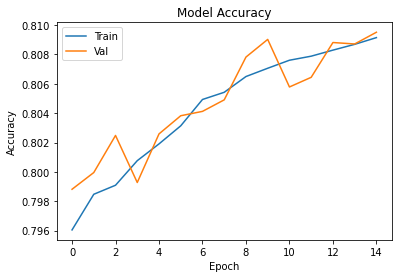

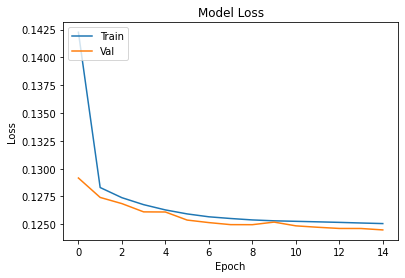

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.15%
accuracy: 85.52%
accuracy: 85.06%
accuracy: 89.22%
accuracy: 85.02%
accuracy: 89.94%
accuracy: 85.61%
accuracy: 90.53%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.15%
accuracy: 72.28%
accuracy: 70.87%
accuracy: 79.06%
accuracy: 71.05%
accuracy: 80.63%
accuracy: 71.79%
accuracy: 81.50%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 565360 samples, validate on 141340 samples
Epoch 1/30
565360/565360 [==============================] - 24s 43us/step - loss: 0.1462 - accuracy: 0.7912 - val_loss: 0.1296 - val_accuracy: 0.7914
Epoch 2/30
565360/565360 [==============================] - 25s 45us/step - loss: 0.1278 - accuracy: 0.7943 - val_loss: 0.1266 - val_accuracy: 0.7967
Epoch 3/30
565360/565360 [==============================] - 25s 44us/step - loss: 0.1267 - accuracy: 0.7994 - val_loss: 0.1261 - val_accuracy: 0.8004
Epoch 4/30
565360/565360 [==============================] - 25s 43us/step - loss: 0.1262 - accuracy: 0.8032 - val_loss: 0.1256 - val_accuracy: 0.8075
Epoch 5/30
565360/565360 [==============================] - 25s 44us/step - loss: 0.1256 - accuracy: 0.8060 - val_loss: 0.1252 - val_accuracy: 0.8026
Epoch 6/30
565360/565360 [==============================] - 24s 43us/step - loss: 0.1249 - accuracy: 0.8096 - val_loss: 0.1242 - val_accuracy: 0.8121
Epoch 7/30
565360/565360 [======================

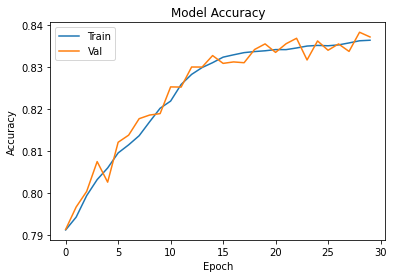

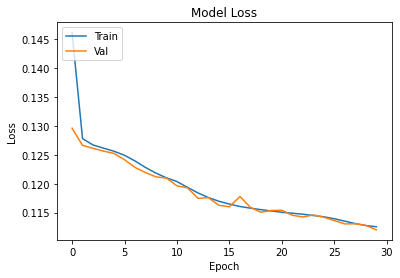

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.80%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.57%
accuracy: 82.50%
accuracy: 82.36%
accuracy: 84.75%
accuracy: 82.01%
accuracy: 85.65%
accuracy: 82.39%
accuracy: 86.67%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.58%
accuracy: 75.83%
accuracy: 75.36%
accuracy: 80.21%
accuracy: 74.83%
accuracy: 81.19%
accuracy: 75.17%
accuracy: 82.53%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 565360 samples, validate on 141340 samples
Epoch 1/50
565360/565360 [==============================] - 49s 86us/step - loss: 0.1179 - accuracy: 0.8217 - val_loss: 0.1088 - val_accuracy: 0.8395
Epoch 2/50
565360/565360 [==============================] - 47s 82us/step - loss: 0.1109 - accuracy: 0.8349 - val_loss: 0.1019 - val_accuracy: 0.8478
Epoch 3/50
565360/565360 [==============================] - 47s 84us/step - loss: 0.1065 - accuracy: 0.8415 - val_loss: 0.0986 - val_accuracy: 0.8533
Epoch 4/50
565360/565360 [==============================] - 48s 84us/step - loss: 0.1034 - accuracy: 0.8461 - val_loss: 0.0968 - val_accuracy: 0.8571
Epoch 5/50
565360/565360 [==============================] - 45s 80us/step - loss: 0.1014 - accuracy: 0.8495 - val_loss: 0.0954 - val_accuracy: 0.8591
Epoch 6/50
565360/565360 [==============================] - 45s 80us/step - loss: 0.1000 - accuracy: 0.8518 - val_loss: 0.0950 - val_accuracy: 0.8575
Epoch 7/50
565360/565360 [======================

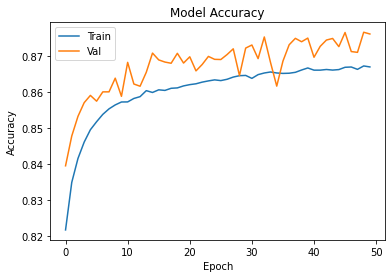

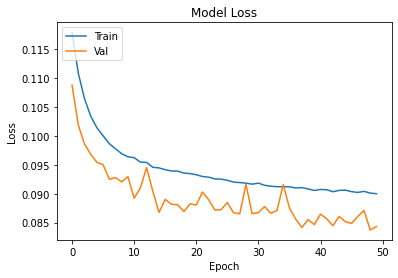

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.60%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.09%
accuracy: 84.13%
accuracy: 83.39%
accuracy: 84.96%
accuracy: 82.83%
accuracy: 85.21%
accuracy: 82.90%
accuracy: 86.33%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.62%
accuracy: 72.92%
accuracy: 71.46%
accuracy: 74.11%
accuracy: 70.46%
accuracy: 74.56%
accuracy: 70.26%
accuracy: 76.35%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 565360 samples, validate on 141340 samples
Epoch 1/50
565360/565360 [==============================] - 46s 82us/step - loss: 0.1189 - accuracy: 0.8197 - val_loss: 0.1086 - val_accuracy: 0.8425
Epoch 2/50
565360/565360 [==============================] - 46s 81us/step - loss: 0.1125 - accuracy: 0.8315 - val_loss: 0.1056 - val_accuracy: 0.8401
Epoch 3/50
565360/565360 [==============================] - 50s 88us/step - loss: 0.1085 - accuracy: 0.8375 - val_loss: 0.1005 - val_accuracy: 0.8486
Epoch 4/50
565360/565360 [==============================] - 44s 79us/step - loss: 0.1046 - accuracy: 0.8445 - val_loss: 0.0949 - val_accuracy: 0.8616
Epoch 5/50
565360/565360 [==============================] - 44s 78us/step - loss: 0.1018 - accuracy: 0.8494 - val_loss: 0.0951 - val_accuracy: 0.8596
Epoch 6/50
565360/565360 [==============================] - 45s 80us/step - loss: 0.0997 - accuracy: 0.8527 - val_loss: 0.0912 - val_accuracy: 0.8651
Epoch 7/50
565360/565360 [======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.38%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.16%
accuracy: 90.28%
accuracy: 90.19%
accuracy: 91.63%
accuracy: 89.84%
accuracy: 91.49%
accuracy: 89.76%
accuracy: 92.00%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.90%
accuracy: 86.10%
accuracy: 86.09%
accuracy: 88.76%
accuracy: 85.46%
accuracy: 88.30%
accuracy: 85.19%
accuracy: 89.20%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.1113626715721
Test Prediction Score 95.15610496049266


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 85.9194174259389
Test Prediction Score 87.46250021676175
Test Prediction Score 87.95211454418693
Test Prediction Score 89.70409750594027
Test Prediction Score 87.71489909832546
Test Prediction Score 89.12439373802579
Test Prediction Score 87.26820519761776
Test Prediction Score 90.60140145588134


In [0]:
y_pred_dt_test= dt.predict(test_X8)
dt_score_test = accuracy_score(test_Y8,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X9)
dt_score_test = accuracy_score(test_Y9,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X10)
dt_score_test = accuracy_score(test_Y10,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X11)
dt_score_test = accuracy_score(test_Y11,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X12)
dt_score_test = accuracy_score(test_Y12,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X13)
dt_score_test = accuracy_score(test_Y13,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X14)
dt_score_test = accuracy_score(test_Y14,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X15)
dt_score_test = accuracy_score(test_Y15,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.85666666666667
Test Prediction Score 85.04333333333334
Test Prediction Score 86.56
Test Prediction Score 87.27000000000001
Test Prediction Score 84.78333333333333
Test Prediction Score 87.13666666666666
Test Prediction Score 85.34
Test Prediction Score 88.49000000000001


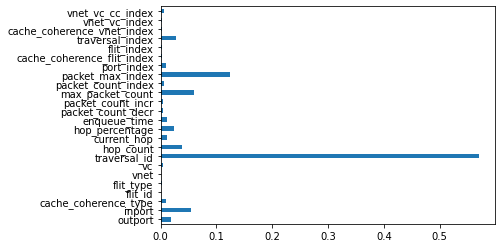

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

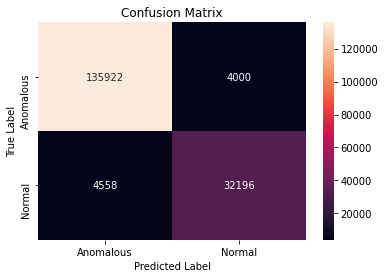

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    139922
           1       0.89      0.88      0.88     36754

    accuracy                           0.95    176676
   macro avg       0.93      0.92      0.93    176676
weighted avg       0.95      0.95      0.95    176676



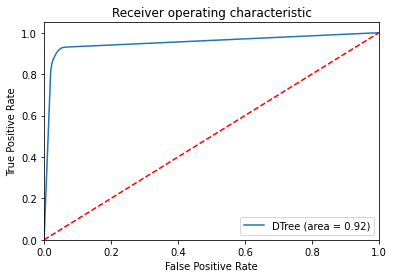

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.00580161313147
Test Prediction Score 95.61060925083204


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 85.97240978478264
Test Prediction Score 88.55497945098584
Test Prediction Score 88.85676875201932
Test Prediction Score 91.82208242875947
Test Prediction Score 88.52211249463289
Test Prediction Score 90.76755786457704
Test Prediction Score 88.20553600433135
Test Prediction Score 92.73760119736036


In [0]:
y_pred_rf_test= rf.predict(test_X8)
rf_score_test = accuracy_score(test_Y8,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X9)
rf_score_test = accuracy_score(test_Y9,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X10)
rf_score_test = accuracy_score(test_Y10,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X11)
rf_score_test = accuracy_score(test_Y11,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X12)
rf_score_test = accuracy_score(test_Y12,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X13)
rf_score_test = accuracy_score(test_Y13,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X14)
rf_score_test = accuracy_score(test_Y14,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X15)
rf_score_test = accuracy_score(test_Y15,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 82.76
Test Prediction Score 86.14666666666668
Test Prediction Score 87.87666666666667
Test Prediction Score 89.88666666666667
Test Prediction Score 85.46666666666667
Test Prediction Score 88.96333333333334
Test Prediction Score 86.61666666666666
Test Prediction Score 91.20333333333333


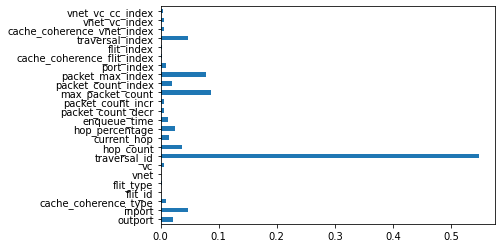

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

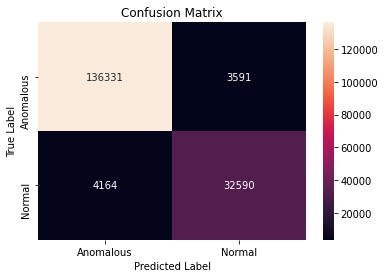

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    139922
           1       0.90      0.89      0.89     36754

    accuracy                           0.96    176676
   macro avg       0.94      0.93      0.93    176676
weighted avg       0.96      0.96      0.96    176676



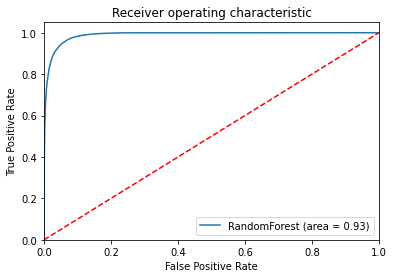

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.90098703548996
Test Prediction Score 98.13422445001392


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 75.99446144378537
Test Prediction Score 77.27643192813915


In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [0]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [0]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'random_state':42,
              'eta': 0.1,
              'eval_metric': 'rmse'}
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
  return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [0]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 20),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,500)
                                            })

In [0]:
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')
|  12       | -0.1646   |  0.8081   |  0.1486   |  19.9     |  270.3    |
{'gamma': 0.7793871670439894, 'learning_rate': 0.1456630131993829, 'max_depth': 19.946233778514383, 'n_estimators': 234.22752975430421}

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.1652   |  0.3316   |  0.5453   |  19.64    |  349.3    |
|  2        | -0.2335   |  0.3049   |  0.2706   |  5.995    |  247.0    |
|  3        | -0.1886   |  0.9735   |  0.9256   |  14.38    |  235.0    |
|  4        | -0.1838   |  0.6026   |  0.9096   |  19.79    |  160.0    |
|  5        | -0.2079   |  0.8892   |  0.5873   |  7.578    |  387.8    |
|  6        | -0.1947   |  0.7517   |  0.07858  |  11.46    |  304.7    |
|  7        | -0.1877   |  0.6443   |  0.1332   |  11.03    |  127.5    |
|  8        | -0.2596   |  0.8822   |  0.8336   |  3.976    |  192.4    |


In [0]:
params = xgb_bo.max['params']
print(params)

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.76047453802629
Test Prediction Score 90.11392997728336
Test Prediction Score 90.4297107487204
Test Prediction Score 95.09222379869742
Test Prediction Score 90.2155431515672
Test Prediction Score 93.56024647461898
Test Prediction Score 89.7688819707634
Test Prediction Score 95.50989863256004


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X8)
xgbc_score_test = accuracy_score(test_Y8,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X9)
xgbc_score_test = accuracy_score(test_Y9,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X10)
xgbc_score_test = accuracy_score(test_Y10,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X11)
xgbc_score_test = accuracy_score(test_Y11,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X12)
xgbc_score_test = accuracy_score(test_Y12,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X13)
xgbc_score_test = accuracy_score(test_Y13,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X14)
xgbc_score_test = accuracy_score(test_Y14,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X15)
xgbc_score_test = accuracy_score(test_Y15,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.72999999999999
Test Prediction Score 88.41666666666667
Test Prediction Score 90.47333333333333
Test Prediction Score 94.55666666666667
Test Prediction Score 88.03666666666666
Test Prediction Score 93.04
Test Prediction Score 89.03999999999999
Test Prediction Score 95.08333333333333


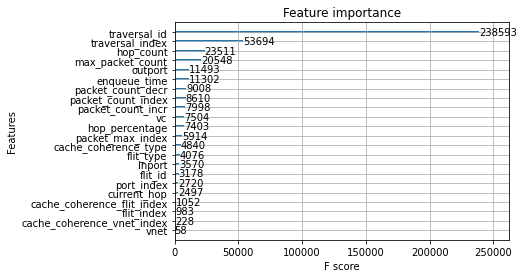

In [0]:
plot_importance(xgbc)
plt.show()

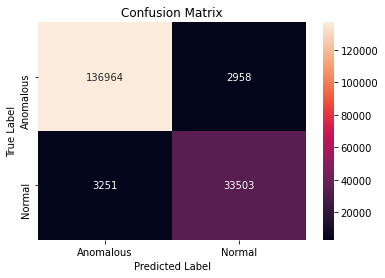

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    139922
           1       0.92      0.91      0.92     36754

    accuracy                           0.96    176676
   macro avg       0.95      0.95      0.95    176676
weighted avg       0.96      0.96      0.96    176676



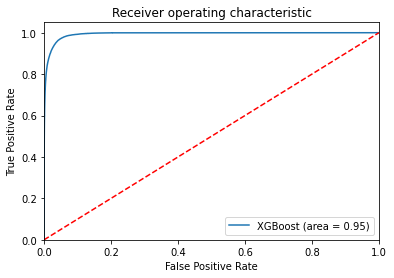

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 91.4049808971275
Test Prediction Score 90.9738730784034


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 90.68189199815382
Test Prediction Score 91.21854786966549
Test Prediction Score 91.20512864114816
Test Prediction Score 93.7520299492299
Test Prediction Score 90.94375268355518
Test Prediction Score 92.9406079016863
Test Prediction Score 91.04798321602598
Test Prediction Score 94.1016395673175


In [0]:
y_pred_gbm_test = gbm.predict(test_X8)
gbm_score_test = accuracy_score(test_Y8,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X9)
gbm_score_test = accuracy_score(test_Y9,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X10)
gbm_score_test = accuracy_score(test_Y10,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X11)
gbm_score_test = accuracy_score(test_Y11,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X12)
gbm_score_test = accuracy_score(test_Y12,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X13)
gbm_score_test = accuracy_score(test_Y13,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X14)
gbm_score_test = accuracy_score(test_Y14,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X15)
gbm_score_test = accuracy_score(test_Y15,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 88.50333333333333
Test Prediction Score 89.53666666666666
Test Prediction Score 89.36333333333333
Test Prediction Score 93.57666666666667
Test Prediction Score 88.70666666666666
Test Prediction Score 92.54666666666667
Test Prediction Score 89.06666666666668
Test Prediction Score 93.99333333333333


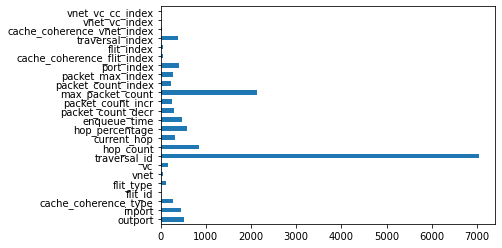

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

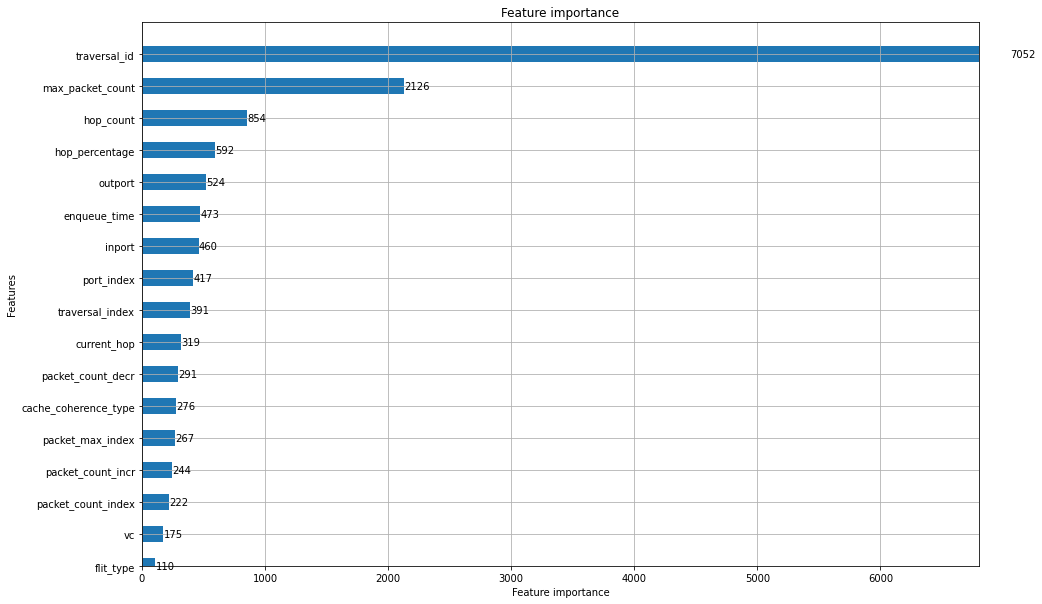

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7052,
 2126,
 854,
 592,
 524,
 473,
 460,
 417,
 391,
 319,
 291,
 276,
 267,
 244,
 222,
 175,
 110,
 52,
 49,
 46,
 42,
 18,
 0,
 0]

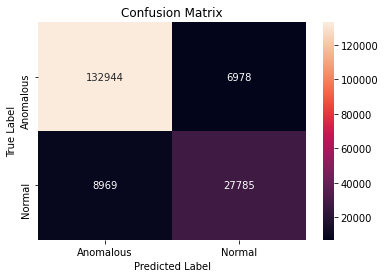

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94    139922
           1       0.80      0.76      0.78     36754

    accuracy                           0.91    176676
   macro avg       0.87      0.85      0.86    176676
weighted avg       0.91      0.91      0.91    176676



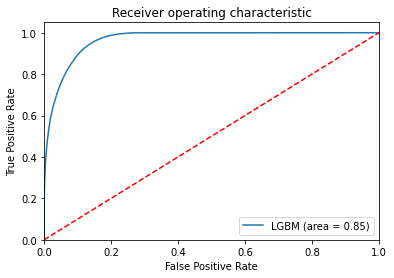

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()